## Including Necessary Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


## loading data

In [3]:
data = pd.read_csv("cb_multi_labeled_balanced.csv")

In [4]:
data.head()

,text,label
0,@ZubearSays Any real nigga isn't letting this ...,ethnicity/race
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,not_cyberbullying
2,"the only thing i wish, i wish a nigga would",ethnicity/race
3,You saudias are not friends of Muslim idiots c...,religion
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,religion


### Exploring data

In [5]:
# checking for unique labels
data["label"].unique()

array(['ethnicity/race', 'not_cyberbullying', 'religion', 'gender/sexual'],
      dtype=object)

In [6]:
# checking for null values
data.isnull().sum()

text     0
label    0
dtype: int64

In [7]:
# checking for duplicate values
data.duplicated().sum()

1

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99990 entries, 0 to 99989
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    99990 non-null  object
 1   label   99990 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [9]:
data_len = data["text"].apply(lambda x: len(x))
data_len

0         53
1        162
2         43
3         61
4        324
        ... 
99985     51
99986    183
99987     86
99988     34
99989     34
Name: text, Length: 99990, dtype: int64

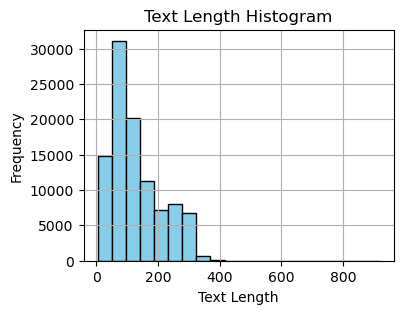

In [10]:
# Plotting the histogram
plt.figure(figsize=(4,3))
plt.hist(data_len, bins=20, color='skyblue', edgecolor='black')
plt.title('Text Length Histogram')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Cleaning and Preprocessing data

In [11]:
data

,text,label
0,@ZubearSays Any real nigga isn't letting this ...,ethnicity/race
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,not_cyberbullying
2,"the only thing i wish, i wish a nigga would",ethnicity/race
3,You saudias are not friends of Muslim idiots c...,religion
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,religion
...,...,...
99985,Thank fuck they didn’t dance remix Peru #LoveI...,not_cyberbullying
99986,Sierra Canyon vs. Alemany - California High Sc...,not_cyberbullying
99987,@queenbellaxoxo @PontiacMadeDDG @HalleBailey B...,gender/sexual
99988,What you like yo nigga to call you,ethnicity/race


In [12]:
import re

def remove_special_char(text):
    # Define the pattern for punctuation, numbers, and special characters
    pattern = r'[^a-zA-Z\s]'  # This pattern will keep only alphabetic characters and whitespaces

    # Use the pattern to remove punctuation, numbers, and special characters
    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text

# Example text
text = "This is a sample text with numbers like 123 and special characters!@#."

# Remove punctuations, numbers, and special characters
cleaned_text = remove_special_char(text)
print(cleaned_text)


This is a sample text with numbers like  and special characters


In [13]:
def remove_usernames(text):
    # Define the pattern for detecting usernames starting with @
    pattern = r'@\w+'  # Matches @ followed by one or more word characters (\w)

    # Use the pattern to replace usernames with an empty string
    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text

# Example text
text = "Hey @john_doe, can you send me the report? My username is @alice123. Thanks!"

# Remove usernames
cleaned_text = remove_usernames(text)
print(cleaned_text)


Hey , can you send me the report? My username is . Thanks!


In [14]:
def remove_urls(text):
    # Define the pattern for detecting URLs
    pattern = r'https?://\S+|www\.\S+'

    # Use the pattern to replace URLs with an empty string
    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text

# Example text
text = "Check out this website: https://www.example.com, and also visit http://example.com."

# Remove URLs
cleaned_text = remove_urls(text)
print(cleaned_text)


Check out this website:  and also visit 


### Create a copy of data

In [15]:
df = data.copy()
df.head()

,text,label
0,@ZubearSays Any real nigga isn't letting this ...,ethnicity/race
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,not_cyberbullying
2,"the only thing i wish, i wish a nigga would",ethnicity/race
3,You saudias are not friends of Muslim idiots c...,religion
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,religion


### Removing Usernames

In [16]:
df['text'] = df['text'].apply(remove_usernames)
df.head()

,text,label
0,Any real nigga isn't letting this happen.,ethnicity/race
1,"I didn't even mention Mexico, but the US...",not_cyberbullying
2,"the only thing i wish, i wish a nigga would",ethnicity/race
3,You saudias are not friends of Muslim idiots c...,religion
4,And yet the MAGA want to do just that. Th...,religion


### Removing Urls/Links

In [17]:
df['text'] = df['text'].apply(remove_urls)
df.head()

,text,label
0,Any real nigga isn't letting this happen.,ethnicity/race
1,"I didn't even mention Mexico, but the US...",not_cyberbullying
2,"the only thing i wish, i wish a nigga would",ethnicity/race
3,You saudias are not friends of Muslim idiots c...,religion
4,And yet the MAGA want to do just that. Th...,religion


### Handling Contractions

In [18]:
import contractions

def expansion(text):
  expanded_text = contractions.fix(text)
  return expanded_text

expanded_text = expansion("I couldn't believe it.")
print(expanded_text)

I could not believe it.


In [19]:
df['text'] = df['text'].apply(expansion)
df.head()

,text,label
0,Any real nigga is not letting this happen.,ethnicity/race
1,"I did not even mention Mexico, but the U...",not_cyberbullying
2,"the only thing i wish, i wish a nigga would",ethnicity/race
3,You saudias are not friends of Muslim idiots c...,religion
4,And yet the MAGA want to do just that. Th...,religion


### Removing special Characters

In [20]:
df['text'] = df['text'].apply(remove_special_char)
df.head()

,text,label
0,Any real nigga is not letting this happen,ethnicity/race
1,I did not even mention Mexico but the US...,not_cyberbullying
2,the only thing i wish i wish a nigga would,ethnicity/race
3,You saudias are not friends of Muslim idiots c...,religion
4,And yet the MAGA want to do just that The...,religion


### Converting the text into small letters

In [21]:
df['text'] = df['text'].str.lower()

In [22]:
df.head(10)

,text,label
0,any real nigga is not letting this happen,ethnicity/race
1,i did not even mention mexico but the us...,not_cyberbullying
2,the only thing i wish i wish a nigga would,ethnicity/race
3,you saudias are not friends of muslim idiots c...,religion
4,and yet the maga want to do just that the...,religion
5,wait its so bad this nigga got rabies,ethnicity/race
6,a voting machine error in new jersey flipped t...,not_cyberbullying
7,now in president jokowi the situation is bet...,religion
8,agreed i used to tell my history students ...,ethnicity/race
9,linked in an email sarah you are on a roll wit...,not_cyberbullying


## Importing nltk libraries

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Removing stopwords

In [24]:
# Sample text
text = "This is a sample sentence, demonstrating the removal of stop words."
def remove_stopword(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Get English stop words
    stop_words = set(stopwords.words('english'))

    # Remove stop words
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Join the filtered tokens back into a sentence
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text

filtered_text = remove_stopword(text)
print(filtered_text)


sample sentence , demonstrating removal stop words .


In [25]:
df['text'] = df['text'].apply(remove_stopword)
df.head(10)

,text,label
0,real nigga letting happen,ethnicity/race
1,even mention mexico us far safest place earth,not_cyberbullying
2,thing wish wish nigga would,ethnicity/race
3,saudias friends muslim idiots cheapless people,religion
4,yet maga want judah christian muslim believe s...,religion
5,wait bad nigga got rabies,ethnicity/race
6,voting machine error new jersey flipped outcom...,not_cyberbullying
7,president jokowi situation better indonesian c...,religion
8,agreed used tell history students birth certif...,ethnicity/race
9,linked email sarah roll career incredible cons...,not_cyberbullying


## Stemmation and Lemmatization

In [26]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function to apply stemming to a text
def stem_text(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [28]:
df['stemmed_text'] = df['text'].apply(stem_text)
df.head(10)

,text,label,stemmed_text
0,real nigga letting happen,ethnicity/race,real nigga let happen
1,even mention mexico us far safest place earth,not_cyberbullying,even mention mexico us far safest place earth
2,thing wish wish nigga would,ethnicity/race,thing wish wish nigga would
3,saudias friends muslim idiots cheapless people,religion,saudia friend muslim idiot cheapless peopl
4,yet maga want judah christian muslim believe s...,religion,yet maga want judah christian muslim believ sy...
5,wait bad nigga got rabies,ethnicity/race,wait bad nigga got rabi
6,voting machine error new jersey flipped outcom...,not_cyberbullying,vote machin error new jersey flip outcom local...
7,president jokowi situation better indonesian c...,religion,presid jokowi situat better indonesian chines ...
8,agreed used tell history students birth certif...,ethnicity/race,agre use tell histori student birth certif say...
9,linked email sarah roll career incredible cons...,not_cyberbullying,link email sarah roll career incred consid sac...


In [29]:
datatable = df[['label','stemmed_text']]
datatable

,label,stemmed_text
0,ethnicity/race,real nigga let happen
1,not_cyberbullying,even mention mexico us far safest place earth
2,ethnicity/race,thing wish wish nigga would
3,religion,saudia friend muslim idiot cheapless peopl
4,religion,yet maga want judah christian muslim believ sy...
...,...,...
99985,not_cyberbullying,thank fuck danc remix peru loveisland
99986,not_cyberbullying,sierra canyon vs alemani california high schoo...
99987,gender/sexual,bitch flirt snitch
99988,ethnicity/race,like yo nigga call


# Building Models

### Support Vector Classifier

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [31]:
from sklearn.metrics import roc_curve, auc

In [32]:
X = datatable['stemmed_text']  # Features
y = datatable['label']  # Target variable

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size=0.25, random_state=50)

In [35]:
# Define and train the model pipeline
SVC_model_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text to TF-IDF vectors
    ('clf', SVC(kernel='linear'))  # Support Vector Classifier
])
SVC_model_pipeline.fit(X_train, y_train)

# Evaluate the model
SVC_y_pred = SVC_model_pipeline.predict(X_test)
print(classification_report(y_test, SVC_y_pred))

                   precision    recall  f1-score   support

   ethnicity/race       0.99      1.00      0.99      4293
    gender/sexual       1.00      1.00      1.00      4246
not_cyberbullying       0.99      1.00      1.00     12386
         religion       1.00      0.98      0.99      4073

         accuracy                           0.99     24998
        macro avg       1.00      0.99      0.99     24998
     weighted avg       0.99      0.99      0.99     24998



In [36]:
# Calculate accuracy
SVM_acc = accuracy_score(y_test,SVC_y_pred)

# Calculate precision
SVM_precision = precision_score(y_test, SVC_y_pred,average='micro')

# Calculate recall
SVM_recall = recall_score(y_test, SVC_y_pred,average='micro')

# Calculate F1 score
SVM_f1 = f1_score(y_test, SVC_y_pred,average='micro')

print("Accuracy: ", SVM_acc)
print("Precision:", SVM_precision)
print("Recall:", SVM_recall)
print("F1 Score:", SVM_f1)


Accuracy:  0.9948795903672294
Precision: 0.9948795903672294
Recall: 0.9948795903672294
F1 Score: 0.9948795903672294


In [37]:
SVC_model_pipeline.predict(["A black guy is not meant to be in the same coach as we are."])

array(['not_cyberbullying'], dtype=object)

### Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
RF_model_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text to TF-IDF vectors
    ('clf', RandomForestClassifier(n_estimators=10, random_state=30))  # Random Forest Classifier
])
RF_model_pipeline.fit(X_train, y_train)

# Step 4: Evaluate the model
RF_y_pred = RF_model_pipeline.predict(X_test)
print(classification_report(y_test, RF_y_pred))

                   precision    recall  f1-score   support

   ethnicity/race       0.99      0.97      0.98      4293
    gender/sexual       0.99      0.97      0.98      4246
not_cyberbullying       0.98      1.00      0.99     12386
         religion       0.99      0.96      0.98      4073

         accuracy                           0.98     24998
        macro avg       0.99      0.97      0.98     24998
     weighted avg       0.98      0.98      0.98     24998



In [1]:
import tkinter as tk

def send_message():
    message = message_entry.get()
    if message:
        chat_display.config(state=tk.NORMAL)
        if "not" in message:
            chat_display.insert(tk.END, "You: " + message + "\n", "red")
        else:
            chat_display.insert(tk.END, "You: " + message + "\n")
        chat_display.config(state=tk.DISABLED)
        message_entry.delete(0, tk.END)

def receive_message():
    message = "Hello! How can I assist you?"
    chat_display.config(state=tk.NORMAL)
    if "not" in message:
        chat_display.insert(tk.END, "Bot: " + message + "\n", "red")
    else:
        chat_display.insert(tk.END, "Bot: " + message + "\n")
    chat_display.config(state=tk.DISABLED)

root = tk.Tk()
root.title("Simple Messaging Interface")

chat_display = tk.Text(root, height=20, width=50)
chat_display.config(state=tk.DISABLED)
chat_display.pack(pady=10)

message_entry = tk.Entry(root, width=50)
message_entry.pack(pady=5)

send_button = tk.Button(root, text="Send", command=send_message)
send_button.pack(pady=5)

# Define the "red" tag style
chat_display.tag_config("red", foreground="red")

receive_message()

root.mainloop()


In [41]:
# Calculate accuracy
RF_acc = accuracy_score(y_test,RF_y_pred)

# Calculate precision
RF_precision = precision_score(y_test, RF_y_pred,average='micro')

# Calculate recall
RF_recall = recall_score(y_test, RF_y_pred,average='micro')

# Calculate F1 score
RF_f1 = f1_score(y_test, RF_y_pred,average='micro')

print("Accuracy: ", RF_acc)
print("Precision:", RF_precision)
print("Recall:", RF_recall)
print("F1 Score:", RF_f1)


Accuracy:  0.9819185534842787
Precision: 0.9819185534842787
Recall: 0.9819185534842787
F1 Score: 0.9819185534842787


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN_model_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text to TF-IDF vectors
    ('clf', KNeighborsClassifier(n_neighbors=int((datatable.shape[0])**(0.5))))  # Support Vector Classifier
])
KNN_model_pipeline.fit(X_train, y_train)

# Step 4: Evaluate the model
KNN_y_pred = KNN_model_pipeline.predict(X_test)
print(classification_report(y_test, KNN_y_pred))

                   precision    recall  f1-score   support

   ethnicity/race       0.96      0.75      0.84      4293
    gender/sexual       0.96      0.58      0.72      4246
not_cyberbullying       0.75      0.99      0.85     12386
         religion       0.97      0.68      0.80      4073

         accuracy                           0.83     24998
        macro avg       0.91      0.75      0.80     24998
     weighted avg       0.86      0.83      0.82     24998



In [ ]:
# Calculate accuracy
KNN_acc = accuracy_score(y_test,KNN_y_pred)

# Calculate precision
KNN_precision = precision_score(y_test, KNN_y_pred,average='micro')

# Calculate recall
KNN_recall = recall_score(y_test, KNN_y_pred,average='micro')

# Calculate F1 score
KNN_f1 = f1_score(y_test, KNN_y_pred,average='micro')

print("Accuracy: ", KNN_acc)
print("Precision:", KNN_precision)
print("Recall:", KNN_recall)
print("F1 Score:", KNN_f1)


Accuracy:  0.8262260980878471
Precision: 0.8262260980878471
Recall: 0.8262260980878471
F1 Score: 0.8262260980878471


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
NB_model_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text to TF-IDF vectors
    ('clf', MultinomialNB())  # Naive Bayes
])
NB_model_pipeline.fit(X_train, y_train)

# Step 4: Evaluate the model
NB_y_pred = model_pipeline.predict(X_test)
print(classification_report(y_test, NB_y_pred))



                   precision    recall  f1-score   support

   ethnicity/race       0.88      0.77      0.82      4293
    gender/sexual       0.98      0.56      0.71      4246
not_cyberbullying       0.83      0.99      0.90     12386
         religion       0.93      0.92      0.93      4073

         accuracy                           0.87     24998
        macro avg       0.91      0.81      0.84     24998
     weighted avg       0.88      0.87      0.86     24998



In [ ]:
# Calculate accuracy
NB_acc = accuracy_score(y_test,NB_y_pred)

# Calculate precision
NB_precision = precision_score(y_test, NB_y_pred,average='micro')

# Calculate recall
NB_recall = recall_score(y_test, NB_y_pred,average='micro')

# Calculate F1 score
NB_f1 = f1_score(y_test, NB_y_pred,average='micro')

print("Accuracy: ", NB_acc)
print("Precision:", NB_precision)
print("Recall:", NB_recall)
print("F1 Score:", NB_f1)


Accuracy:  0.8671493719497559
Precision: 0.8671493719497559
Recall: 0.8671493719497559
F1 Score: 0.8671493719497559


# GUI INTEGRATED

### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
DT_model_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text to TF-IDF vectors
    ('clf', DecisionTreeClassifier(criterion='gini',max_depth=8))  # Multinomial LogisticRegression
])
DT_model_pipeline.fit(X_train, y_train)

# Step 4: Evaluate the model
DT_y_pred = DT_model_pipeline.predict(X_test)
print(classification_report(y_test, DT_y_pred))

                   precision    recall  f1-score   support

   ethnicity/race       1.00      0.94      0.97      4293
    gender/sexual       1.00      1.00      1.00      4246
not_cyberbullying       0.95      1.00      0.98     12386
         religion       1.00      0.90      0.95      4073

         accuracy                           0.97     24998
        macro avg       0.99      0.96      0.97     24998
     weighted avg       0.98      0.97      0.97     24998



In [35]:
# Calculate accuracy
DT_acc = accuracy_score(y_test,DT_y_pred)

# Calculate precision
DT_precision = precision_score(y_test, DT_y_pred,average='micro')

# Calculate recall
DT_recall = recall_score(y_test, DT_y_pred,average='micro')

# Calculate F1 score
DT_f1 = f1_score(y_test, DT_y_pred,average='micro')

print("Accuracy: ", DT_acc)
print("Precision:", DT_precision)
print("Recall:", DT_recall)
print("F1 Score:", DT_f1)


Accuracy:  0.9741579326346108
Precision: 0.9741579326346108
Recall: 0.9741579326346108
F1 Score: 0.9741579326346108


In [36]:
prediction = DT_model_pipeline.predict(
    ["A black guy is not meant to be in the same coach as we are."])

In [37]:
result = prediction[0]
result

'not_cyberbullying'

In [39]:
# fucntion for cleaning the data fed for prediction
def data_clean(data):
    data = remove_usernames(data)
    data = remove_urls(data)
    data = contractions.fix(data)
    data = remove_special_char(data)
    data = data.lower()
    data = remove_stopword(data)
    data = stem_text(data)
    
    return data

data = "these aren't Good Guys, Sending The Link https://www.google.com"
print(data_clean(data))

good guy send link


In [46]:
import tkinter as tk

def send_message():
    message = message_entry.get()
    data = message
    message = data_clean(message)
    prediction = DT_model_pipeline.predict([message])
    result = prediction[0]
    if result:
        chat_display.config(state=tk.NORMAL)
        if result in ['ethnicity/race', 'religion', 'gender/sexual']:
            chat_display.insert(tk.END, "You: " + data + "\n", "red")
        else:
            chat_display.insert(tk.END, "You: " + data + "\n")
        chat_display.config(state=tk.DISABLED)
        message_entry.delete(0, tk.END)

def receive_message():
    message = "Hello! How can I assist you?"
    chat_display.config(state=tk.NORMAL)
    if "not" in message:
        chat_display.insert(tk.END, "Bot: " + message + "\n", "red")
    else:
        chat_display.insert(tk.END, "Bot: " + message + "\n")
    chat_display.config(state=tk.DISABLED)

root = tk.Tk()
root.title("Simple Messaging Interface")

chat_display = tk.Text(root, height=20, width=50)
chat_display.config(state=tk.DISABLED)
chat_display.pack(pady=10)

message_entry = tk.Entry(root, width=50)
message_entry.pack(pady=5)

send_button = tk.Button(root, text="Send", command=send_message)
send_button.pack(pady=5)

# Define the "red" tag style
chat_display.tag_config("red", foreground="red")

receive_message()

root.mainloop()


## Visualization

In [ ]:
accuracy_list = {"SVM":SVM_acc,"RF":RF_acc,"KNN":KNN_acc,"NB":NB_acc,"DT":DT_acc}

In [ ]:
accuracy = list(map(lambda x: x*100, accuracy_list.values()))

print(accuracy)

[99.48795903672294, 98.19185534842786, 82.6226098087847, 86.71493719497559, 97.41579326346108]


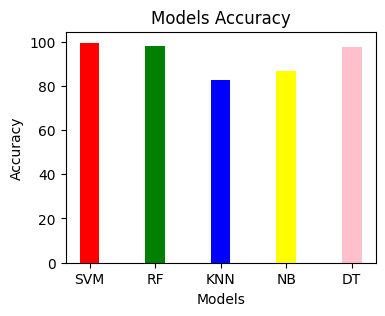

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(4,3))
plt.bar(accuracy_list.keys(), accuracy,color=['red','green','blue','yellow','pink'],width= 0.3,align='center')

# Adding labels and title
plt.xlabel("Models")
plt.ylabel('Accuracy')
plt.title('Models Accuracy')

# Display the chart
plt.show()


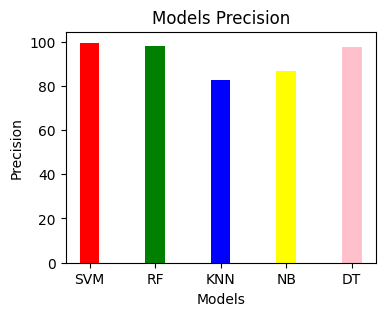

In [ ]:
# Visualizing Precision
precision_list = {"SVM":SVM_precision,"RF":RF_precision,"KNN":KNN_precision,"NB":NB_precision,"DT":DT_precision}
precision = list(map(lambda x: x*100, precision_list.values()))
# Plotting the bar chart
plt.figure(figsize=(4,3))
plt.bar(precision_list.keys(), precision,color=['red','green','blue','yellow','pink'],width= 0.3,align='center')

# Adding labels and title
plt.xlabel("Models")
plt.ylabel('Precision')
plt.title('Models Precision')

# Display the chart
plt.show()

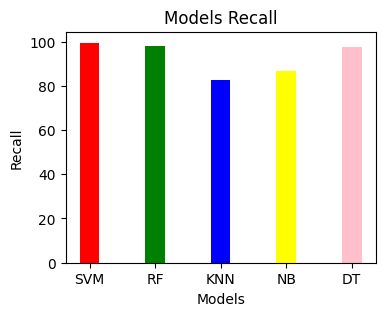

In [ ]:
# Visualizing Recall
recall_list = {"SVM":SVM_recall,"RF":RF_recall,"KNN":KNN_recall,"NB":NB_recall,"DT":DT_recall}
recall = list(map(lambda x: x*100, recall_list.values()))
# Plotting the bar chart
plt.figure(figsize=(4,3))
plt.bar(recall_list.keys(), recall,color=['red','green','blue','yellow','pink'],width= 0.3,align='center')

# Adding labels and title
plt.xlabel("Models")
plt.ylabel('Recall')
plt.title('Models Recall')

# Display the chart
plt.show()

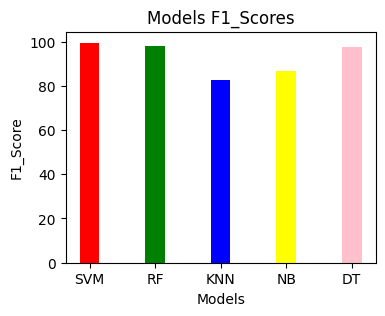

In [ ]:
# Visualizing F1_Score

f1_list = {"SVM":SVM_f1,"RF":RF_f1,"KNN":KNN_f1,"NB":NB_f1,"DT":DT_f1}
f1 = list(map(lambda x: x*100, precision_list.values()))
# Plotting the bar chart
plt.figure(figsize=(4,3))
plt.bar(f1_list.keys(), f1,color=['red','green','blue','yellow','pink'],width= 0.3,align='center')

# Adding labels and title
plt.xlabel("Models")
plt.ylabel('F1_Score')
plt.title('Models F1_Scores')

# Display the chart
plt.show()